In [1]:
data <- read.csv("new_chr12_static_classified.csv")
head(data,10)
# tail(data,10)
# head(read.csv("new_chr19_static_classified.csv"))

X,binID,start,cata,aRead,bRead,aNorm,bNorm
125000,chr12_3002000,3001900,3,131,210,76.162791,73.170732
56064,chr12_3002000,3001900,2,34,53,19.767442,18.466899
1,chr12_3002000,3001900,1,7,24,4.069767,8.362369
125001,chr12_3002600,3002500,3,12,16,100.000000,100.000000
125002,chr12_3002900,3002800,3,22,32,59.459459,94.117647
56065,chr12_3002900,3002800,2,15,2,40.540541,5.882353
125003,chr12_3003100,3003000,3,74,140,77.083333,77.348066
56066,chr12_3003100,3003000,2,22,41,22.916667,22.651934
125004,chr12_3003300,3003200,3,10,9,71.428571,81.818182
56067,chr12_3003300,3003200,2,4,2,28.571429,18.181818


In [2]:
high_sub <- data[data$cata == 3, c("binID", "start", "bRead")]
names(high_sub) <- c("binID", "start", "high")
# head(high_sub)
medium_sub <- data[data$cata == 2, c("binID", "start", "bRead")]
names(medium_sub) <- c("binID", "start", "medium")
# head(medium_sub)
low_sub <- data[data$cata == 1, c("binID", "start", "bRead")]
names(low_sub) <- c("binID", "start", "low")
# head(low_sub)

# merge
clusterdf <- merge(high_sub, medium_sub, all = TRUE)
clusterdf <- merge(clusterdf, low_sub, all = TRUE)
clusterdf <- clusterdf[order(as.numeric(clusterdf$start)),]
clusterdf[is.na(clusterdf)] <- 0
head(clusterdf,10)

,binID,start,high,medium,low
28139,chr12_3002000,3001900,210,53,24
28143,chr12_3002600,3002500,16,0,0
28146,chr12_3002900,3002800,32,2,0
28147,chr12_3003100,3003000,140,41,0
28149,chr12_3003300,3003200,9,2,0
28154,chr12_3003800,3003700,552,21,4
28155,chr12_3003900,3003800,54,1,0
28161,chr12_3005200,3005100,60,0,0
28164,chr12_3005400,3005300,302,148,79
28165,chr12_3005500,3005400,10,4,3


In [3]:
paste("Total number of Bins:", nrow(clusterdf))

[1] "Total number of Bins: 73722"

In [4]:
# write.csv(clusterdf, "A_clusterdf_count.csv")

In [5]:
dist_tolerance <- 100
# meth_tolerance <- 40 
# cor_2_cutoff <- 0.9
alpha <- 0.05

In [6]:
pre.row <- clusterdf[1,]

dist.fun <- function(row) {
    dist <- as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"]))
    pre.row <<- row
    return(c(row["binID"], row["start"], row["high"], row["medium"], row["low"], dist = dist)) 
}

dist.result <- t(apply(clusterdf, 1, dist.fun))
dist.result <- as.data.frame(dist.result)
head(dist.result, 30)

,binID,start,high,medium,low,dist
28139,chr12_3002000,3001900,210,53,24,0
28143,chr12_3002600,3002500,16,0,0,600
28146,chr12_3002900,3002800,32,2,0,300
28147,chr12_3003100,3003000,140,41,0,200
28149,chr12_3003300,3003200,9,2,0,200
28154,chr12_3003800,3003700,552,21,4,500
28155,chr12_3003900,3003800,54,1,0,100
28161,chr12_3005200,3005100,60,0,0,1300
28164,chr12_3005400,3005300,302,148,79,200
28165,chr12_3005500,3005400,10,4,3,100


In [7]:
dist.result <- dist.result[as.numeric(as.character(dist.result$dist)) <= dist_tolerance, ]
head(dist.result)

dist.result <- dist.result[-1,]
head(dist.result)
nrow(dist.result)

,binID,start,high,medium,low,dist
28139,chr12_3002000,3001900,210,53,24,0
28155,chr12_3003900,3003800,54,1,0,100
28165,chr12_3005500,3005400,10,4,3,100
28258,chr12_3015400,3015300,137,74,35,100
28262,chr12_3015800,3015700,79,76,30,100
28263,chr12_3015900,3015800,304,175,22,100


,binID,start,high,medium,low,dist
28155,chr12_3003900,3003800,54,1,0,100
28165,chr12_3005500,3005400,10,4,3,100
28258,chr12_3015400,3015300,137,74,35,100
28262,chr12_3015800,3015700,79,76,30,100
28263,chr12_3015900,3015800,304,175,22,100
28266,chr12_3016400,3016300,162,109,11,100


[1] 10270

In [8]:
start.pos <- dist.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3003700   3003800   3005300   3005400   3015200   3015300   3015600
    [8]   3015700   3015800   3016200   3016300   3017200   3017300   3017600
   [15]   3017700   3017800   3017900   3018300   3018400   3018500   3018600
   [22]   3018700   3019300   3019400   3019500   3020800   3020900   3021600
   [29]   3021700   3021800   3021900   3022100   3022200   3034300   3034400
   [36]   3036500   3036600   3046200   3046300   3062200   3062300   3068300
   [43]   3068400   3068500   3068600   3075300   3075400   3092300   3092400
   [50]   3096400   3096500   3098000   3098100   3103000   3103100   3110800
   [57]   3110900   3135500   3135600   3149400   3149500   3149600   3149700
   [64]   3153800   3153900   3161400   3161500   3163800   3163900   3172300
   [71]   3172400   3178400   3178500   3197000   3197100   3203200   3203300
   [78]   3204300   3204400   3208800   3208900   3215400   3215500   3228900
   [85]   3229000   3235900   3236000   3236100   3236200   3236300   3238700
   [92]   3238800   3241600   3241700   3275500   3275600   3308600   3308700
   [99]   3325900   3326000   3340200   3340300   3360800   3360900   3375000
  [106]   3375100   3376000   3376100   3379400   3379500   3385400   3385500
  [113]   3387900   3388000   3391100   3391200   3402500   3402600   3414700
  [120]   3414800   3426200   3426300   3426400   3426500   3431700   3431800
  [127]   3467300   3467400   3480800   3480900   3493900   3494000   3502100
  [134]   3502200   3502300   3521900   3522000   3523500   3523600   3536300
  [141]   3536400   3540900   3541000   3576000   3576100   3589100   3589200
  [148]   3594500   3594600   3596600   3596700   3597800   3597900   3605500
  [155]   3605600   3605700   3605800   3635500   3635600   3635700   3648000
  [162]   3648100   3648300   3648400   3663400   3663500   3670300   3670400
  [169]   3678000   3678100   3684300   3684400   3691100   3691200   3691300
  [176]   3712100   3712200   3736000   3736100   3739400   3739500   3780400
  [183]   3780500   3791600   3791700   3808000   3808100   3811100   3811200
  [190]   3813400   3813500   3829700   3829800   3829900   3834500   3834600
  [197]   3859200   3859300   3873700   3873800   3891100   3891200   3894000
  [204]   3894100   3894900   3895000   3895900   3896000   3896100   3899300
  [211]   3899400   3899600   3899700   3917600   3917700   3920500   3920600
  [218]   3922200   3922300   3930500   3930600   3931700   3931800   3931900
  [225]   3940300   3940400   3942000   3942100   3942200   3974600   3974700
  [232]   3978700   3978800   3992900   3993000   4009100   4009200   4016500
  [239]   4016600   4026100   4026200   4048400   4048500   4058400   4058500
  [246]   4058600   4062900   4063000   4075600   4075700   4083900   4084000
  [253]   4085800   4085900   4101600   4101700   4108700   4108800   4113700
  [260]   4113800   4138900   4139000   4140100   4140200   4156800   4156900
  [267]   4157000   4160100   4160200   4172300   4172400   4172500   4180300
  [274]   4180400   4190500   4190600   4192800   4192900   4194400   4194500
  [281]   4195200   4195300   4213100   4213200   4215800   4215900   4231300
  [288]   4231400   4231500   4233800   4233900   4237600   4237700   4250100
  [295]   4250200   4265600   4265700   4271800   4271900   4278000   4278100
  [302]   4290700   4290800   4290900   4394000   4394100   4419500   4419600
  [309]   4437000   4437100   4437200   4437300   4437400   4437500   4437600
  [316]   4437700   4455500   4455600   4459800   4459900   4464800   4464900
  [323]   4466700   4466800   4474900   4475000   4475200   4475300   4488700
  [330]   4488800   4491200   4491300   4492700   4492800   4507200   4507300
  [337]   4513300   4513400   4516500   4516600   4525500   4525600   4547300
  [344]   4547400   4566800   4566900   4567800   4567900   4594000   4594100
  [351]   4632900   4633000   4633100   4695800   4695900   4696200   4696300
  [358]   4696400   471990

In [9]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
dist.result <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
28154,chr12_3003800,3003700,552,21,4
28155,chr12_3003900,3003800,54,1,0
28164,chr12_3005400,3005300,302,148,79
28165,chr12_3005500,3005400,10,4,3
28257,chr12_3015300,3015200,28,10,2
28258,chr12_3015400,3015300,137,74,35
28261,chr12_3015700,3015600,33,2,0
28262,chr12_3015800,3015700,79,76,30
28263,chr12_3015900,3015800,304,175,22
28265,chr12_3016300,3016200,219,56,27


In [10]:
pre.row <- dist.result[1,]

test.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = "0"))
    } else {
        test.matrix <- cbind(c(as.numeric(as.character(pre.row["high"])),
                               as.numeric(as.character(pre.row["medium"])),
                               as.numeric(as.character(pre.row["low"]))),
                             c(as.numeric(as.character(row["high"])), 
                               as.numeric(as.character(row["medium"])),
                               as.numeric(as.character(row["low"]))))
        test.matrix <- test.matrix[rowSums(test.matrix) > 0, ]
        value <- suppressWarnings(chisq.test(test.matrix)$p.value)
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = as.character(value)))
    }
}

test.result <- apply(dist.result[-1,], MARGIN = 1, FUN = test.fun)
test.result <- t(test.result)
test.result <- as.data.frame(test.result)
head(test.result)

,binID,start,p.value
28155,chr12_3003900,3003800,0.639892865254406
28164,chr12_3005400,3005300,0
28165,chr12_3005500,3005400,0.901920231265809
28257,chr12_3015300,3015200,0
28258,chr12_3015400,3015300,0.150468616782018
28261,chr12_3015700,3015600,0


In [11]:
good.result <- test.result[as.numeric(as.character(test.result$p.value)) > alpha,]
head(good.result)

,binID,start,p.value
28155,chr12_3003900,3003800,0.639892865254406
28165,chr12_3005500,3005400,0.901920231265809
28258,chr12_3015400,3015300,0.150468616782018
28308,chr12_3021000,3020900,0.0940404366740525
28314,chr12_3021800,3021700,0.159125512122692
28319,chr12_3022300,3022200,0.999999999999999


In [12]:
start.pos <- good.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3003700   3003800   3005300   3005400   3015200   3015300   3020800
   [8]   3020900   3021600   3021700   3022100   3022200   3036500   3036600
  [15]   3062200   3062300   3068300   3068400   3068500   3068600   3092300
  [22]   3092400   3161400   3161500   3208800   3208900   3215400   3215500
  [29]   3275500   3275600   3308600   3308700   3385400   3385500   3426200
  [36]   3426300   3467300   3467400   3502100   3502200   3523500   3523600
  [43]   3536300   3536400   3594500   3594600   3597800   3597900   3605700
  [50]   3605800   3648300   3648400   3684300   3684400   3691200   3691300
  [57]   3791600   3791700   3808000   3808100   3829700   3829800   3834500
  [64]   3834600   3859200   3859300   3873700   3873800   3894900   3895000
  [71]   3895900   3896000   3899300   3899400   3931700   3931800   3942000
  [78]   3942100   4016500   4016600   4108700   4108800   4113700   4113800
  [85]   4172300   4172400   4190500   4190600   4231400   4231500   4265600
  [92]   4265700   4271800   4271900   4394000   4394100   4419500   4419600
  [99]   4437100   4437200   4437300   4437500   4437600   4437700   4455500
 [106]   4455600   4459800   4459900   4464800   4464900   4491200   4491300
 [113]   4507200   4507300   4633000   4633100   4695800   4695900   4696200
 [120]   4696300   4696400   4772000   4772100   4774700   4774800   4782400
 [127]   4782500   4787800   4787900   4788400   4788500   4802200   4802300
 [134]   4803000   4803100   4804100   4804200   4806300   4806400   4806800
 [141]   4806900   4807400   4807500   4815700   4815800   4892900   4893000
 [148]   4924900   4925000   4935300   4935400   5004400   5004500   5004700
 [155]   5004800   5018000   5018100   5054700   5054800   5054900   5057400
 [162]   5057500   5058000   5058100   5058200   5058300   5058500   5058600
 [169]   5058700   5058800   5084300   5084400   5118000   5118100   5137600
 [176]   5137700   5207800   5207900   5210000   5210100   5286300   5286400
 [183]   5301100   5301200   5335000   5335100   5335200   5409800   5409900
 [190]   5485100   5485200   5485300   5485400   5485500   5488000   5488100
 [197]   5615800   5615900   5616000   5616800   5616900   5643200   5643300
 [204]   5804200   5804300   5806900   5807000   5886500   5886600   6129500
 [211]   6129600   6154100   6154200   6235300   6235400   6320200   6320300
 [218]   6338600   6338700   6367700   6367800   6396200   6396300   6396400
 [225]   6420100   6420200   6513100   6513200   6516300   6516400   6516500
 [232]   6588600   6588700   6649800   6649900   6700200   6700300   6701200
 [239]   6701300   6771300   6771400   6803100   6803200   7078500   7078600
 [246]   7146700   7146800   7147400   7147500   7149500   7149600   7151000
 [253]   7151100   7151300   7151400   7287400   7287500   7435700   7435800
 [260]   7526900   7527000   7628500   7628600   7690000   7690100   7709200
 [267]   7709300   7802000   7802100   7833900   7834000   7989600   7989700
 [274]   7998300   7998400   7998500   8006400   8006500   8031800   8031900
 [281]   8032000   8067700   8067800   8081600   8081700   8233000   8233100
 [288]   8274200   8274300   8274400   8276500   8276600   8276800   8276900
 [295]   8313400   8313500   8361900   8362000   8406700   8406800   8498600
 [302]   8498700   8559200   8559300   8560500   8560600   8585000   8585100
 [309]   8585700   8585800   8588200   8588300   8590200   8590300   8620700
 [316]   8620800   8650500   8650600   8743000   8743100   8764300   8764400
 [323]   8775500   8775600   8781300   8781400   8869900   8870000   8907200
 [330]   8907300   8935100   8935200   9006000   9006100   9020900   9021000
 [337]   9035500   9035600   9132100   9132200   9336000   9336100   9336200
 [344]   9429800   9429900   9535400   9535500   9551500   9551600   9551700
 [351]   9551800   9578600   9578700   9588800   9588900   9758800   9758900
 [358]   9874500   9874600   9950200   9950300   9950400   9995800   9995900

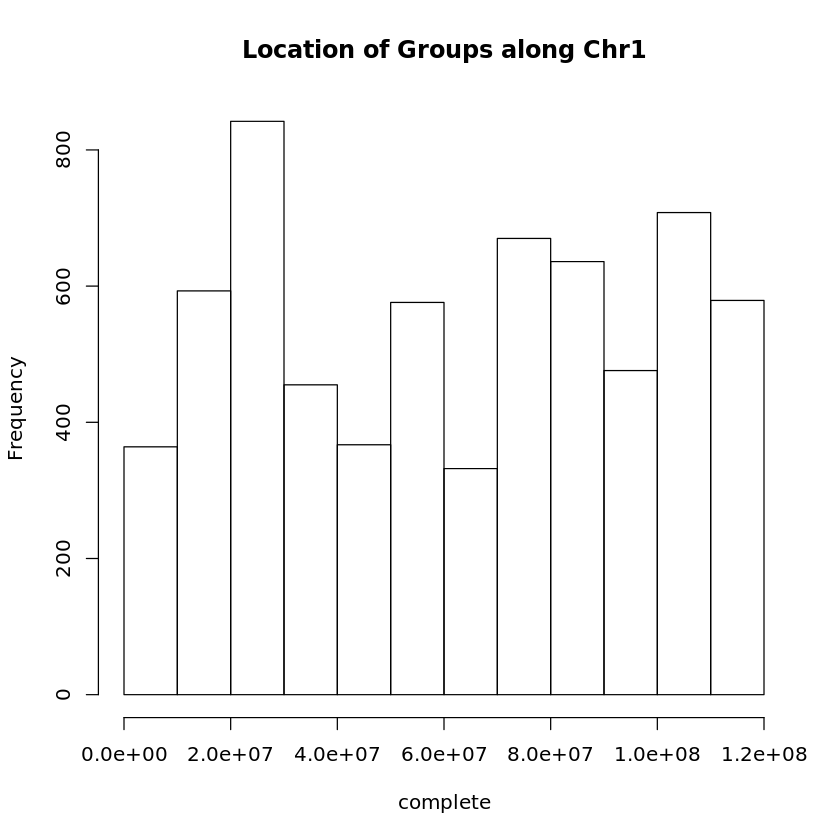

In [13]:
hist(complete, main = "Location of Groups along Chr1")

In [14]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
grouping <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
28154,chr12_3003800,3003700,552,21,4
28155,chr12_3003900,3003800,54,1,0
28164,chr12_3005400,3005300,302,148,79
28165,chr12_3005500,3005400,10,4,3
28257,chr12_3015300,3015200,28,10,2
28258,chr12_3015400,3015300,137,74,35
28307,chr12_3020900,3020800,130,26,2
28308,chr12_3021000,3020900,121,39,6
28311,chr12_3021700,3021600,59,0,0
28314,chr12_3021800,3021700,110,3,4


In [15]:
paste("Total number of bins grouped:", nrow(grouping))

[1] "Total number of bins grouped: 6598"

In [16]:
library(ggplot2)

In [17]:
pre.row <- grouping[1,]

part <- data.frame()
part <- rbind(part, pre.row)

counter = 1
sep.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        part <<- rbind(part, data.frame(binID = c(paste("gap", counter)), 
                                        start = c(0), high = c(100), medium = c(100), low = c(100)))
        counter <<- counter + 1
    }
    part <<- rbind(part, row)
    pre.row <<- row
}

invisible(apply(grouping[-1,], 1, sep.fun))

In [18]:
part[20:60,]

,binID,start,high,medium,low
20,chr12_3036700,3036600,15,3,0
110,gap 7,0,100,100,100
22,chr12_3062300,3062200,17,4,0
23,chr12_3062400,3062300,6,3,0
112,gap 8,0,100,100,100
25,chr12_3068400,3068300,72,3,0
26,chr12_3068500,3068400,122,0,0
27,chr12_3068600,3068500,74,18,0
28,chr12_3068700,3068600,226,30,5
113,gap 9,0,100,100,100


In [19]:
head(part)
tail(part)

,binID,start,high,medium,low
28154,chr12_3003800,3003700,552,21,4
2,chr12_3003900,3003800,54,1,0
1,gap 1,0,100,100,100
4,chr12_3005400,3005300,302,148,79
5,chr12_3005500,3005400,10,4,3
11,gap 2,0,100,100,100


,binID,start,high,medium,low
13666,gap 3109,0,100,100,100
9704,chr12_119667100,119667000,29,2,0
9705,chr12_119667200,119667100,35,0,0
13667,gap 3110,0,100,100,100
9707,chr12_119810100,119810000,91,24,0
9708,chr12_119810200,119810100,231,49,11


In [20]:
write.csv(part, "chr12_B_group.csv")

[1] "Total Number of groups: 3111"

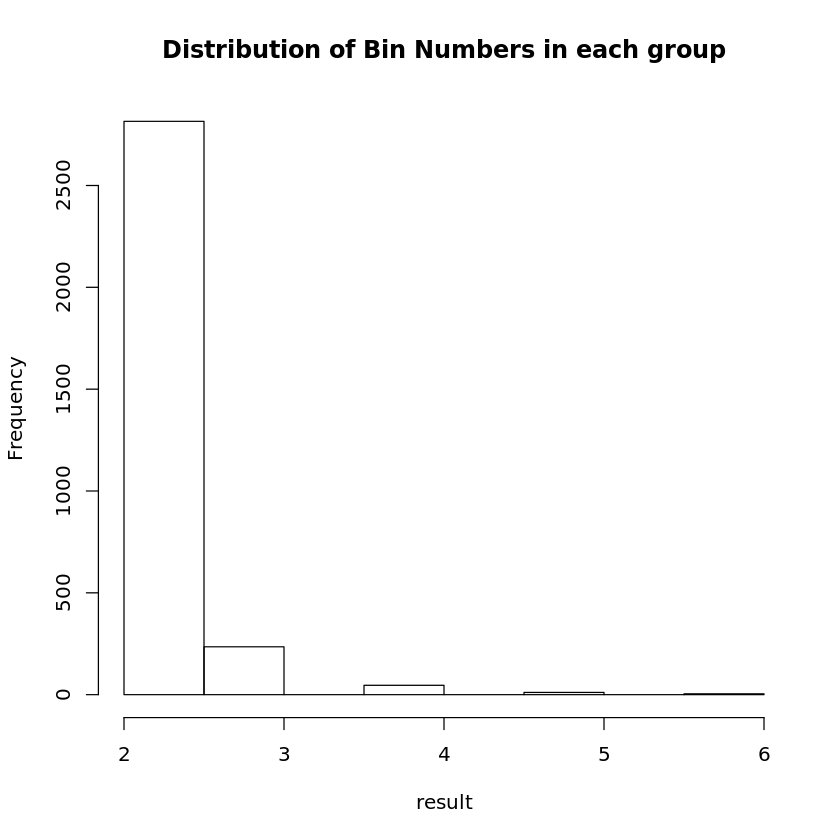

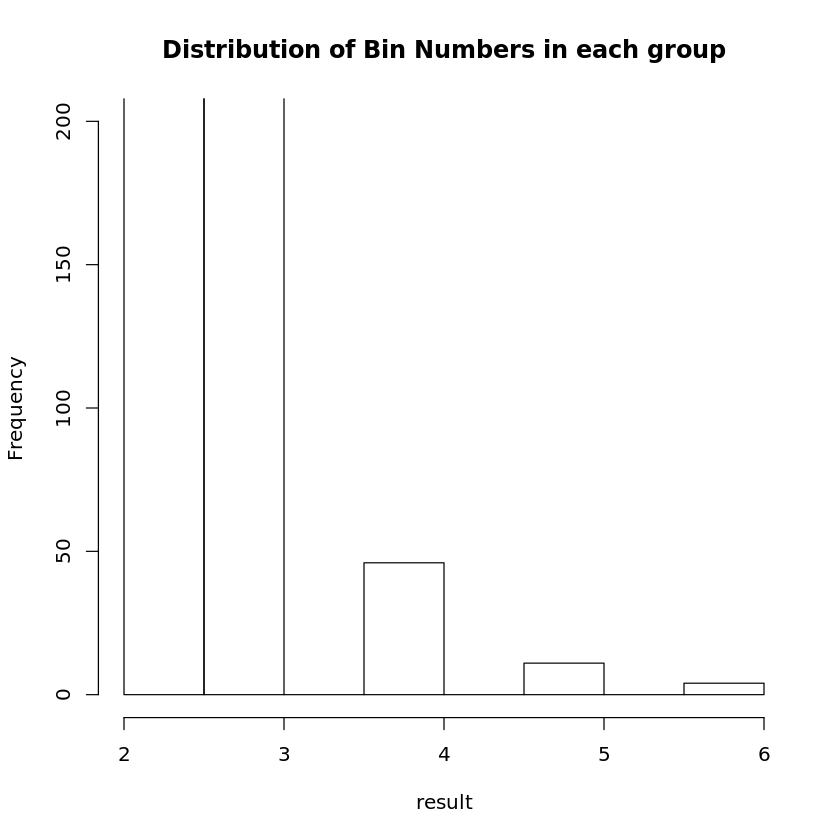

In [21]:
count = 0
result = c()
for (row in 1:nrow(part)) {
    if (substr(as.character(part[row, "binID"]), 1, 3) != "gap") {
        count = count + 1
    } else {
        result = c(result, count)
        count = 0
    }
}

result = c(result, count)

paste("Total Number of groups:", length(result))
hist(result, main = "Distribution of Bin Numbers in each group")
hist(result, ylim = c(0, 200), main = "Distribution of Bin Numbers in each group")

In [22]:
# plotdf <- data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,3])), cata = c(3))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,4])), cata = c(4)))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,5])), cata = c(5)))


# plotdf

In [23]:
# for (i in 2:nrow(part)){
#     if (substr(as.character(part[i,1]),1,3) == "gap"){
#         plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(1)))
#     } else {
#         for (j in 3:5){
#             plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(as.numeric(as.character(part[i,j]))), cata = c(j)))
#         }
#     }
    
# }

# head(plotdf, 10)

In [24]:
# plotdf$cata <- factor(plotdf$cata, levels = c(3,4,5,1), labels = c("high", "medium", "low", "gap"))

# head(plotdf,100)

In [25]:
# plotdf$bin_ID <- factor(plotdf$bin_ID, levels = unique(plotdf$bin_ID))

In [26]:
# plotdf$per <- as.numeric(as.character(plotdf$per))

In [27]:
# names(plotdf) <- c("bin_ID", "count", "cata")

In [28]:
# ggplot(data = plotdf, aes(x = bin_ID, y = count, fill = factor(cata))) + coord_flip() + 
#   geom_bar(stat = "identity", width = 2) + ylim(0, 300) + scale_fill_brewer(palette="Spectral")

In [29]:
# zoomindf <- head(plotdf, 200)
# ggplot(data = zoomindf, aes(x = bin_ID, y = count, fill = factor(cata))) + 
#   geom_bar(stat = "identity") + ylim(0, 500) + scale_fill_brewer(palette="Spectral")